 Raphael Frazao Bach e Silva

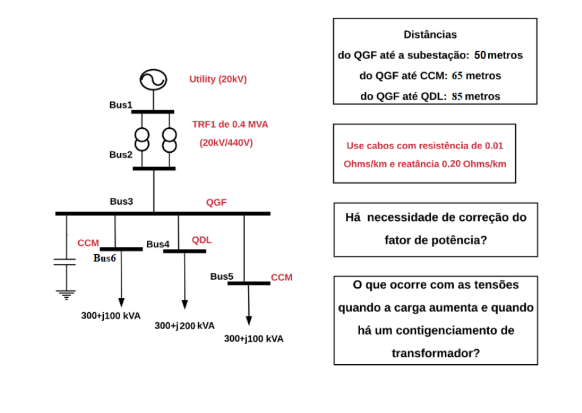

In [ ]:
!pip install pandapower

In [ ]:


import pandapower as pp

net = pp.create_empty_network()

B1 = pp.create_bus(net,vn_kv=20,name="Barra Cruzeiro")
B2 = pp.create_bus(net,vn_kv=0.44,name="Barra Racionais")
B3 = pp.create_bus(net,vn_kv=0.44,name="Barra Naruto")
B4 = pp.create_bus(net,vn_kv=0.44,name="Barra Luffy")
B5 = pp.create_bus(net,vn_kv=0.44,name="Barra Neymar")
B6 = pp.create_bus(net,vn_kv=0.44,name="Barra TFT de Cria")

pp.create_ext_grid(net,B1,vm_pu=1.0, name="Grind connection")
pp.create_load(net,B5,p_mw=0.3,q_mvar=0.1, name="carga 1")
pp.create_load(net,B4,p_mw=0.3,q_mvar=0.2, name="carga 2")
pp.create_load(net,B6,p_mw=0.3,q_mvar=0.1, name="carga 3")

pp.create_transformer(net, hv_bus=B1, lv_bus=B2, std_type="0.4 MVA 20/0.4 kV", name="TRAFO 1" )
pp.create_transformer(net, hv_bus=B1, lv_bus=B2, std_type="0.4 MVA 20/0.4 kV", name="TRAFO 2" )

pp.create_line_from_parameters(net, B2, B3, 0.05, 0.01, 0.2, 0, 0)
pp.create_line_from_parameters(net, B3, B4, 0.065, 0.01, 0.2, 0, 0)
pp.create_line_from_parameters(net, B3, B5, 0.065, 0.01, 0.2, 0, 0)
pp.create_line_from_parameters(net, B3, B6, 0.085, 0.01, 0.2, 0, 0)
pp.runpp(net)

print("Sem Banco de Capacitores")
print(net.res_bus)
pp.create_shunt(net,B3,q_mvar=-1.45)
 #Compensação aumento de carga = 0.7mw
    # Implemento de geração distribuida;
#pp.create_gen(net, B3,0.6,vm_pu=1)
    # Aumento da potencia do banco de capacitores;
#pp.create_shunt(net,B3,q_mvar=-1.9)
print("Com Banco de Capacitores")
pp.runpp(net)


print(net.res_bus)

Sem Banco de Capacitores
      vm_pu  va_degree      p_mw    q_mvar
0  1.000000   0.000000 -0.930046 -0.602717
1  0.855702  -3.467298  0.000000  0.000000
2  0.823692  -7.164848  0.000000  0.000000
3  0.805412  -8.846895  0.300000  0.200000
4  0.813844  -8.858172  0.300000  0.100000
5  0.810614  -9.388251  0.300000  0.100000
Com Banco de Capacitores
      vm_pu  va_degree      p_mw    q_mvar
0  1.000000   0.000000 -0.936367  0.817978
1  0.951105  -4.533168  0.000000  0.000000
2  1.000512  -7.497036  0.000000 -1.451487
3  0.985671  -8.628479  0.300000  0.200000
4  0.992533  -8.640030  0.300000  0.100000
5  0.989970  -8.995662  0.300000  0.100000


/usr/local/lib/python3.7/dist-packages/pandapower/results_branch.py:139: RuntimeWarning: divide by zero encountered in true_divide
  res_line_df["loading_percent"].values[:] = i_ka / i_max * 100
/usr/local/lib/python3.7/dist-packages/pandapower/results_branch.py:139: RuntimeWarning: divide by zero encountered in true_divide
  res_line_df["loading_percent"].values[:] = i_ka / i_max * 100
